# Zillow Project


## Goals:
 * Find features that impact home value.
 * Develop a model that can accurately predict home value.

## Imports

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score, mean_squared_error

from sklearn.feature_selection import f_regression
from scipy.stats import pearsonr, spearmanr

from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import explore as e

import warnings
warnings.filterwarnings("ignore")

## Acquire
* Data acquired from Codeup database
* 5 columns and 52441 rows before cleaning
* Each row is a single property
* Each column contains information about the properties

## Prepare
* Rename the columns
* Change the data types of certain columns
* Rename the FIPS values to county for easier readability.
* Drop the null values.
    * Nulls accounted for 0.15% of the data so I felt the best route was to simply drop them.
* Drop outliers which skewed the data.
    * Outliers were determined using the IQR.
    * Values for all columns that fell outside of their respective fences were dropped.
* Split the data into train, validate, split in a 50, 30, 20 split.

## Data Dictionary

|**Feature**|**Description**|
|:-----------|:---------------|
|Bedroom Count | Numbers of bedrooms|
|Bathroom Count | Numbers of bathrooms|
|Square Footage | Total calculated square footage|
|Value | Assessed property value|
|County| County in California where property is located|

In [2]:
# acquire, clean, and split the data

train, validate, test = w.wrangle_zillow()

## Explore
   * Is the county the property located related to the value?
   * Is bedroom count related to home value?
   * Is bathroom count related to home value?
   * Is square footage of the property related to home value?

### Is the county the property is located related to the value?

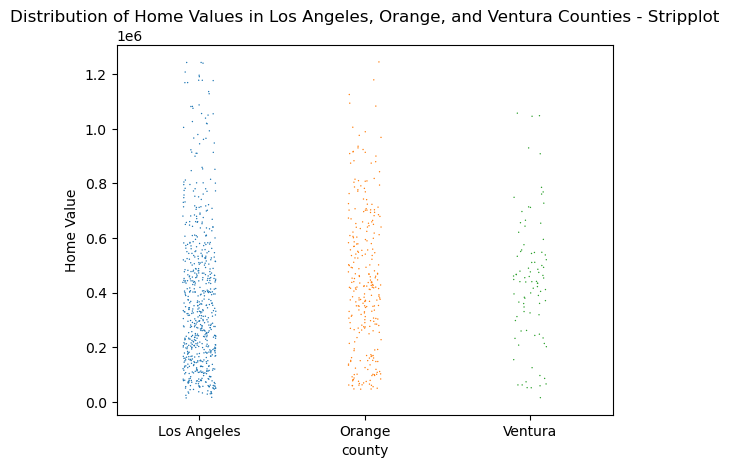

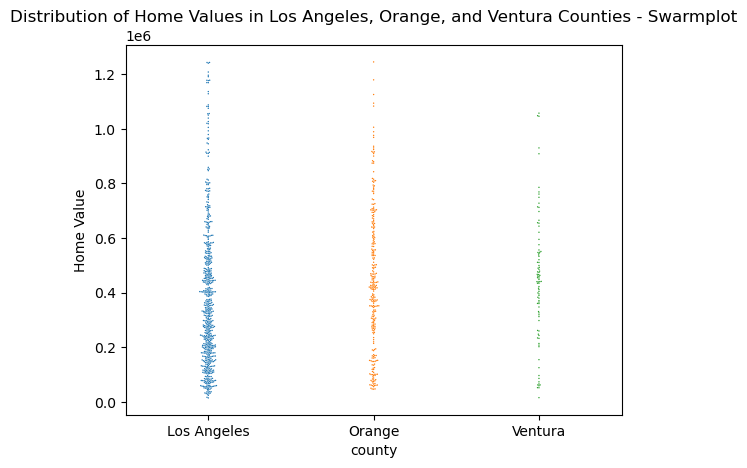

In [3]:
# get county graph
e.get_county_graph(train)

### Is bedroom count related to home value?

$H_0$: Bedroom count is not correlated to home value.

$H_A$: Bedroom count is correlated to home value.

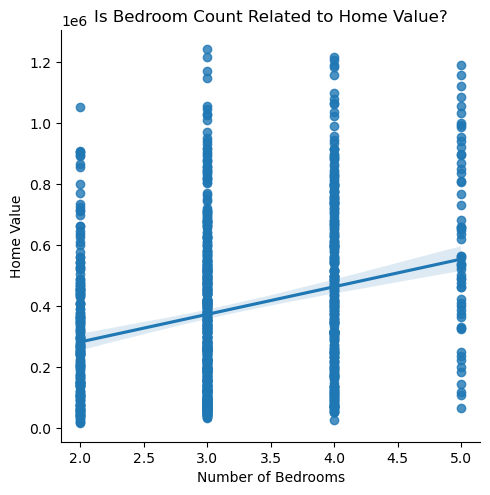

In [4]:
# get bedroom count graph
e.get_bedcount_graph(train)

There is a relationship between bedroom count and home value.

There is a somewhat normal distribution so we will test correlation with the Pearson R correlation test. 

The p is low so we reject the null hypothesis.

In [5]:
r, p = pearsonr(train.bedcount, train.value)

print('r:', r)
print('p:', p)

r: 0.21719012818235423
p: 8.885788267431855e-297


### Is bathroom count related to home value?

$H_0$: Bathroom count is not correlated to home value.

$H_A$: Bathroom count is correlated to home value.

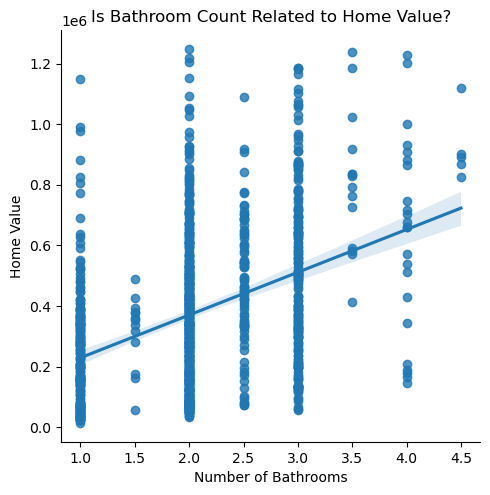

In [6]:
# get bathroom count graph
e.get_bathcount_graph(train)

There is a relationship between bathroom count and home value.

There is not a normal distribution so we will test correlation with the Spearman R correlation test. 

The p is low so we reject the null hypothesis.

In [7]:
r, p = spearmanr(train.bathcount, train.value)

print('r:', r)
print('p:', p)

r: 0.39327904809753533
p: 0.0


### Is square footage related to home value?

$H_0$: Square footage is not correlated to home value.

$H_A$: Bathroom count is correlated to home value.

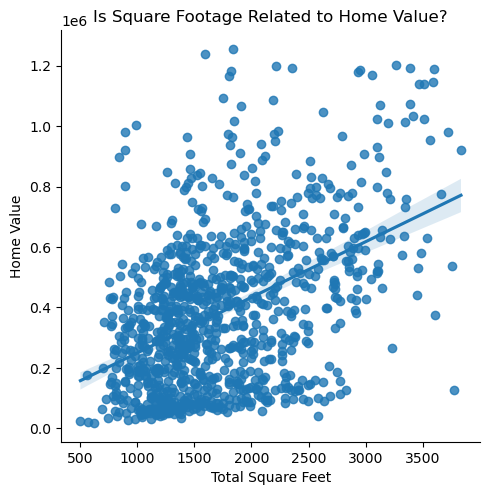

In [8]:
# get sqfeet graph
e.get_sqfeet_graph(train)

There is a relationship between square footage and home value.

There is not a normal distribution so we will test correlation with the Spearman R correlation test. 

The p is low so we reject the null hypothesis.

In [9]:
r, p = spearmanr(train.sqfeet, train.value)

print('r:', r)
print('p:', p)

r: 0.4315829489574306
p: 0.0


## Exploration Summary

   * There is a slight difference across all features between the three different counties.
       * Los Angeles County has a higher amount of lower value homes.
       * Ventura County has fewer amount of high value homes.
        * May be worthwhile to seperate the data by counties.
   * Square footage has the strongest regression line of all three.
   * Bedroom count, bathroom count, square footage are correlated with home value.

# Modeling

   * I will use RMSE as an evaluation metric.
   * Baseline will be the mean of 'value'.

In [10]:
#split for model
X_train, y_train, X_validate, y_validate, X_test, y_test = w.zillow_model_split(train, validate, test)

In [11]:
#get the baseline
y_train, y_validate, metric_df = e.get_baseline(y_train, y_validate)

In [12]:
# run the models and compare the metrics to see the best performing one
y_train, y_validate, metric_df = e.ols_lasso_tweedie(X_train, X_validate, y_train, y_validate, metric_df)

#view metrics
metric_df

RMSE for OLS using LinearRegression
        Training/In-Sample:  229009.90 
        Validation/Out-of-Sample: 229394.99

RMSE for LassoLars
        Training/In-Sample:  229009.90 
        Validation/Out-of-Sample: 229394.99

RMSE for TweedieRegressor
        Training/In-Sample:  263101.91 
        Validation/Out-of-Sample: 265680.88



,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,263101.906237,265680.881195,2.220446e-16
1,ols,229009.902364,229394.993077,2.544740e-01
2,lasso_alpha0.03,229009.902364,229394.993280,2.544740e-01
3,tweedie_power1_alpha1.0,263101.906237,265680.881195,2.220446e-16


* LassoLars and OLS were the best performing models with an RMSE of approx 229,394 with and $R^2$ of approx 25%.   
* Tweedie performed the same as baseline.
* I will move forward with the LassoLars (alpha = 0.03) model.

### LassoLars on Test Data

In [13]:
# run model on test data
e.lasso_test_model(X_train, y_train, X_test, y_test)

RMSE for LassoLars:
    _____________________________________________      
    Test Performance: 228000.62
    Test Explained Variance: 0.237
    Baseline: 387863.31


## Conclusion
* LassoLars performed better than baseline on unseen test data.
* This model will only be able to perform accurately on homes that fall within the upper and lower quartiles of the data.

## Next Steps
   * Split the data by counties and run three seperate models.
   * Try scaling data to see if it makes a difference in current model.
   * Bathroom and bedroom counts are correlated - feature engineering a combined column.
   * Explore different features in dataset.

## Recommendations
  * Continue developing model as this current one is not accurate for implementation for certain purposes.